This is an exploration of the whole series of mortality data from the CDC.

First let's configure logging, including turning off the preconfigured loggers.

In [1]:
from logging import Formatter
from logging import getLogger
from logging import INFO
from logging import StreamHandler

logger = getLogger(__name__)
logger.handlers.clear()
handler = StreamHandler()
handler.setLevel(INFO)
handler.setFormatter(Formatter('%(name)s - %(asctime)s - %(levelname)s - %(message)s'))
logger.addHandler(handler)

Let's list all the files. We note that we have data files in CSV format representing the years 2005-2015, inclusive (11 years).

In [2]:
from os import walk
from os.path import join

for dirname, _, filenames in walk('../input/mortality/'):
    for filename in filenames:
        logger.info(msg=join(dirname, filename))

__main__ - 2023-06-16 13:45:54,392 - INFO - ../input/mortality/2014_codes.json
__main__ - 2023-06-16 13:45:54,393 - INFO - ../input/mortality/2007_data.csv
__main__ - 2023-06-16 13:45:54,394 - INFO - ../input/mortality/2007_codes.json
__main__ - 2023-06-16 13:45:54,395 - INFO - ../input/mortality/2012_data.csv
__main__ - 2023-06-16 13:45:54,396 - INFO - ../input/mortality/2010_data.csv
__main__ - 2023-06-16 13:45:54,397 - INFO - ../input/mortality/2009_data.csv
__main__ - 2023-06-16 13:45:54,398 - INFO - ../input/mortality/2011_data.csv
__main__ - 2023-06-16 13:45:54,399 - INFO - ../input/mortality/2015_codes.json
__main__ - 2023-06-16 13:45:54,401 - INFO - ../input/mortality/2011_codes.json
__main__ - 2023-06-16 13:45:54,402 - INFO - ../input/mortality/2006_data.csv
__main__ - 2023-06-16 13:45:54,403 - INFO - ../input/mortality/2010_codes.json
__main__ - 2023-06-16 13:45:54,404 - INFO - ../input/mortality/2005_data.csv
__main__ - 2023-06-16 13:45:54,405 - INFO - ../input/mortality/200

In [3]:
from json import load
with open(file='../input/mortality/2013_codes.json', mode='r', encoding='utf-8', ) as codes_fp:
    codes = load(fp=codes_fp,)
for key in codes.keys():
    logger.info(msg=key)

__main__ - 2023-06-16 13:45:54,442 - INFO - resident_status
__main__ - 2023-06-16 13:45:54,443 - INFO - education_1989_revision
__main__ - 2023-06-16 13:45:54,444 - INFO - education_2003_revision
__main__ - 2023-06-16 13:45:54,445 - INFO - education_reporting_flag
__main__ - 2023-06-16 13:45:54,447 - INFO - month_of_death
__main__ - 2023-06-16 13:45:54,448 - INFO - sex
__main__ - 2023-06-16 13:45:54,449 - INFO - age_substitution_flag
__main__ - 2023-06-16 13:45:54,450 - INFO - age_recode_52
__main__ - 2023-06-16 13:45:54,451 - INFO - age_recode_27
__main__ - 2023-06-16 13:45:54,451 - INFO - age_recode_12
__main__ - 2023-06-16 13:45:54,452 - INFO - infant_age_recode_22
__main__ - 2023-06-16 13:45:54,453 - INFO - place_of_death_and_decedents_status
__main__ - 2023-06-16 13:45:54,454 - INFO - marital_status
__main__ - 2023-06-16 13:45:54,455 - INFO - day_of_week_of_death
__main__ - 2023-06-16 13:45:54,456 - INFO - current_data_year
__main__ - 2023-06-16 13:45:54,457 - INFO - injury_at_wor

If we try to load up all of the data we may run out of memory, so let's start by doing one big load of just the columns we initially want across all 11 years; we'll use a list comprehension and concat() to avoid saving two copies of the data, and we'll hide the progress information in our CSV reading code. We have one year where one column is named differently, so we have to modify the used columns based on the year.

In [4]:
from pandas import concat
from pandas import read_csv
from pandas import DataFrame

USECOLS = ['activity_code', 'autopsy', 'current_data_year', 'day_of_week_of_death', 'detail_age', 'education_reporting_flag',
           'injury_at_work', 'manner_of_death', 'marital_status', 'method_of_disposition', 'month_of_death', 
           'place_of_death_and_decedents_status', 'race', 'resident_status', 'sex']

def get_usecols(year: int) -> list:
    return sorted(USECOLS + ['icd_code_10th_revision']) if year != 2012 else sorted(USECOLS + ['icd_code_10'])

def read(filename: str, usecols: list, ) -> DataFrame:
    logger = getLogger(name=__name__)
    logger.info(msg='reading {}'.format(filename))
    result_df = read_csv(filepath_or_buffer=filename, low_memory=False, usecols=usecols, )
    if 'icd_code_10' in result_df.columns:
        result_df = result_df.rename(columns={'icd_code_10': 'icd_code_10th_revision'})
    logger.info(msg='read {} rows.'.format(len(result_df)))
    logger.debug(msg=result_df.columns)
    return result_df

df = concat([read(filename='../input/mortality/{}_data.csv'.format(year),
                  usecols=get_usecols(year), ) for year in range(2005, 2016)])

__main__ - 2023-06-16 13:45:54,522 - INFO - reading ../input/mortality/2005_data.csv
__main__ - 2023-06-16 13:46:04,832 - INFO - read 2452506 rows.
__main__ - 2023-06-16 13:46:04,834 - INFO - reading ../input/mortality/2006_data.csv
__main__ - 2023-06-16 13:46:14,494 - INFO - read 2430725 rows.
__main__ - 2023-06-16 13:46:14,496 - INFO - reading ../input/mortality/2007_data.csv
__main__ - 2023-06-16 13:46:24,051 - INFO - read 2428343 rows.
__main__ - 2023-06-16 13:46:24,052 - INFO - reading ../input/mortality/2008_data.csv
__main__ - 2023-06-16 13:46:33,621 - INFO - read 2476811 rows.
__main__ - 2023-06-16 13:46:33,622 - INFO - reading ../input/mortality/2009_data.csv
__main__ - 2023-06-16 13:46:43,066 - INFO - read 2441219 rows.
__main__ - 2023-06-16 13:46:43,068 - INFO - reading ../input/mortality/2010_data.csv
__main__ - 2023-06-16 13:46:52,590 - INFO - read 2472542 rows.
__main__ - 2023-06-16 13:46:52,591 - INFO - reading ../input/mortality/2011_data.csv
__main__ - 2023-06-16 13:47

Let's see how much data we have.

In [5]:
logger.info(msg='row count: {:,}'.format(len(df)))
logger.info(msg='bytes: {:,}'.format(df.memory_usage().sum()))

__main__ - 2023-06-16 13:47:51,892 - INFO - row count: 27,720,673
__main__ - 2023-06-16 13:47:51,907 - INFO - bytes: 3,770,011,528


Let's make our first graph: a plot of the total deaths for each year.
And let's use lmplot() to include a trend line.

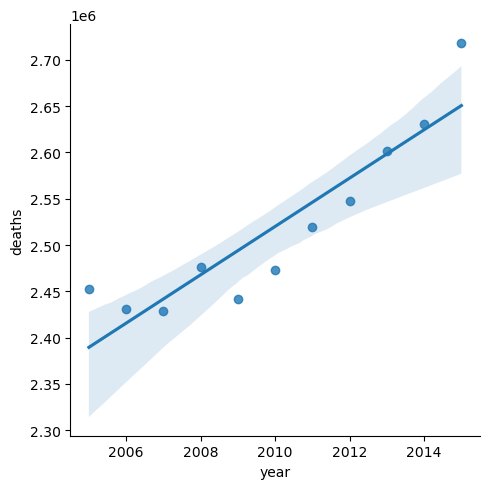

In [6]:
from seaborn import lmplot
%matplotlib inline
annual_total_df = df['current_data_year'].value_counts().to_frame(name='deaths').reset_index()
annual_total_df.columns = ['year', 'deaths']
lmplot(data=annual_total_df, x='year', y='deaths',)

Let's try splitting out male and female deaths.

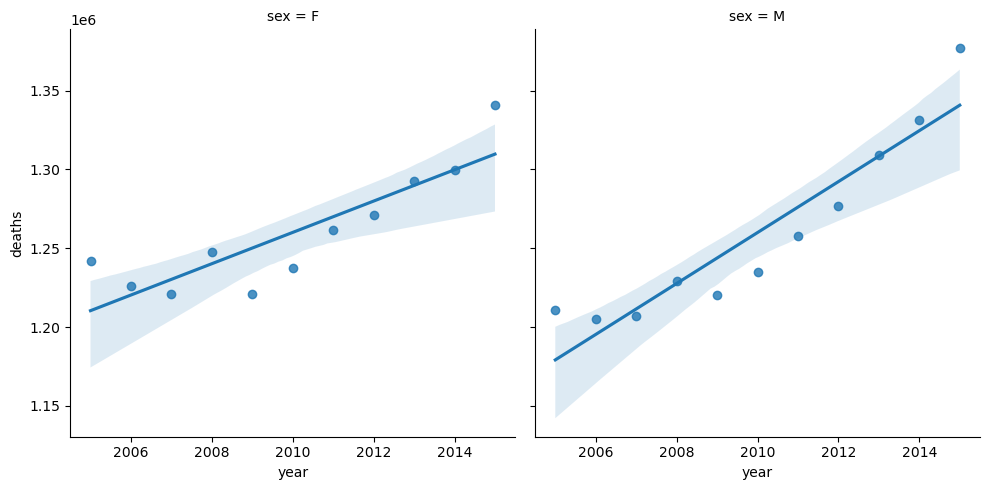

In [7]:
plot_df = df.groupby(by=['current_data_year', 'sex']).size().reset_index().rename(columns={'current_data_year': 'year', 0: 'deaths'})
lmplot(col='sex', data=plot_df, x='year', y='deaths',)
column = 'sex'
for item in plot_df[column].unique():
    title = '{} = {}'.format(column, item)
    if title in annual_total_df.columns:
        annual_total_df = annual_total_df.drop(columns=[title],)
    annual_total_df = annual_total_df.merge(right=plot_df[plot_df[column] == item], on='year').drop(columns=[column]).rename(columns={'deaths' : title})

Let's get the race names, add a column for the race name, and split out the deaths by race.

In [8]:
codes = {key: value for key, value in codes.items() if key in df.columns}
df['race_name'] = df['race'].replace(to_replace={int(key): value for key, value in codes['race'].items()})

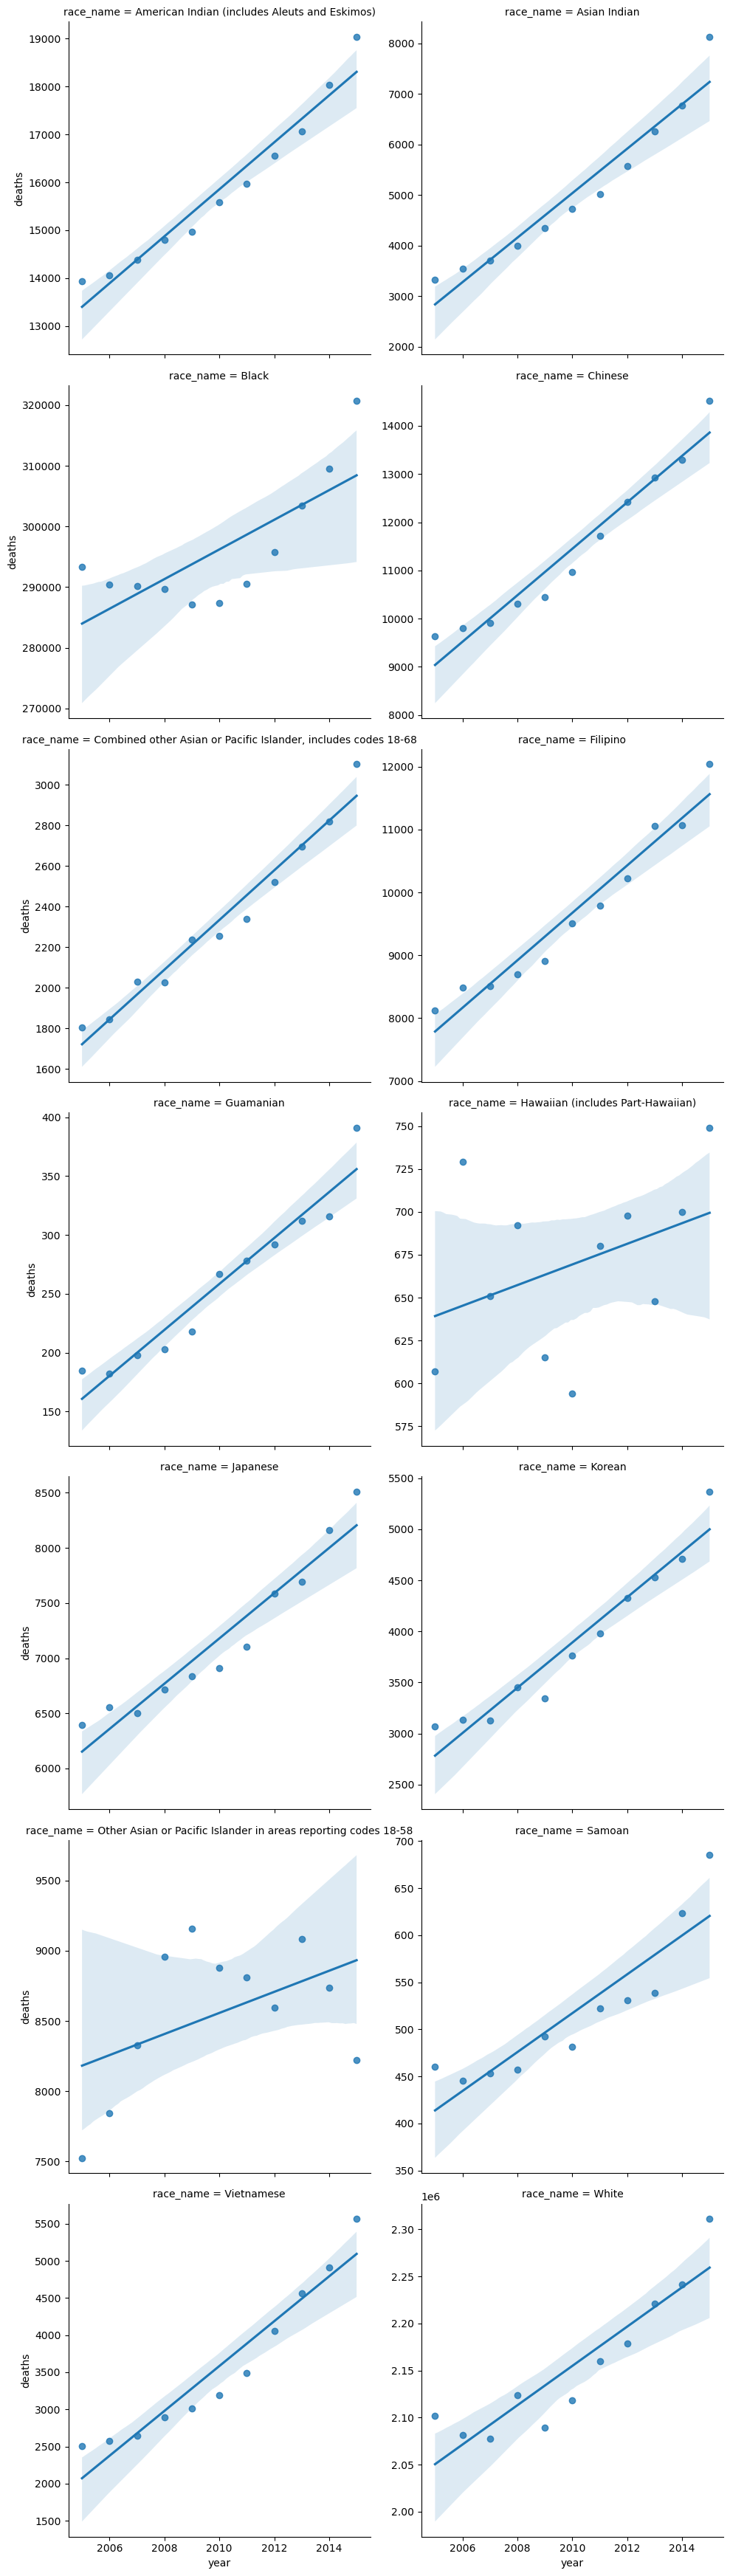

In [9]:
lmplot(data=df.groupby(by=['current_data_year', 'race_name']).size().reset_index().rename(columns={'current_data_year': 'year', 0: 'deaths'}),
       facet_kws=dict(sharey=False), col='race_name', seed=1, col_wrap=2,
       x='year', y='deaths',)

In [10]:
logger.info(msg=codes.keys())
icd_counts = list(df['icd_code_10th_revision'].value_counts().to_dict().items())
logger.info(icd_counts[:10])

__main__ - 2023-06-16 13:48:23,103 - INFO - dict_keys(['resident_status', 'education_reporting_flag', 'month_of_death', 'sex', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'current_data_year', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code', 'icd_code_10th_revision', 'race'])
__main__ - 2023-06-16 13:48:25,066 - INFO - [('I251', 1936376), ('C349', 1723585), ('I219', 1388327), ('J449', 1136896), ('F03', 1049358), ('G309', 896200), ('I64', 755369), ('I250', 657654), ('I500', 607764), ('J189', 512409)]


TODO: add the covariance for sex and race
TODO: start digging into the top ICD codes

In [11]:
logger.info(msg='done')

__main__ - 2023-06-16 13:48:25,133 - INFO - done
